Dataset shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   7

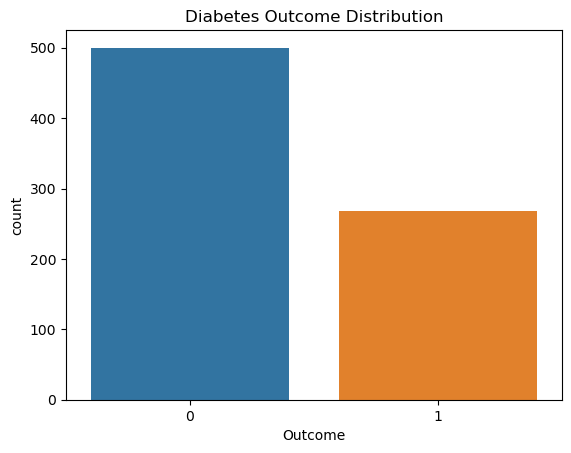

Train shape: (614, 8) Test shape: (154, 8)
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154

Diabetes Random Forest model saved successfully!
Best Logistic Regression Params: {'C': 10, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69 

In [7]:
# %% [markdown]
# # Diabetes Model: Comparison of 3 Models
#
# This notebook loads the diabetes dataset, performs EDA and preprocessing, trains three models (Random Forest, Logistic Regression, and SVM) with hyperparameter tuning, evaluates them, and saves each model.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Ensure Models directory exists
os.makedirs("Models", exist_ok=True)

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# %%
# Load the diabetes dataset (adjust the path if needed)
df = pd.read_csv(r"C:\Users\pc\Desktop\med\Datasets\diabetes_data.csv")
print("Dataset shape:", df.shape)
df.head()

# %%
# Basic EDA
df.info()
print(df.describe())
print("Missing values:\n", df.isnull().sum())

sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

# %%
# Data Preprocessing
# Replace zeros in certain columns (where 0 is invalid) with NaN and then fill with the column mean.
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_clean:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

# %%
# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# %%
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# %% [markdown]
# ### Model 1: Random Forest Classifier

# %%
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=10, cv=5,
    scoring='accuracy', random_state=42, n_jobs=-1
)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)

y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

# Save the Random Forest model
joblib.dump(best_rf, "Models/diabetes_rf_model.pkl")
print("Diabetes Random Forest model saved successfully!")

# %% [markdown]
# ### Model 2: Logistic Regression

# %%
# Hyperparameter tuning for Logistic Regression using GridSearchCV
lr = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

# Save the Logistic Regression model
joblib.dump(best_lr, "Models/diabetes_lr_model.pkl")
print("Diabetes Logistic Regression model saved successfully!")

# %% [markdown]
# ### Model 3: Support Vector Machine

# %%
# Hyperparameter tuning for SVM using GridSearchCV
svc = SVC(probability=True)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print("Best SVM Params:", svc_grid.best_params_)

y_pred_svc = best_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", accuracy_svc)
print(classification_report(y_test, y_pred_svc))

# Save the SVM model
joblib.dump(best_svc, "Models/diabetes_svc_model.pkl")
print("Diabetes SVM model saved successfully!")

# %%
# Compare model accuracies
print("Comparison of Models for Diabetes:")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"SVM Accuracy: {accuracy_svc:.4f}")
